In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fit Shape Model

In [2]:
from sdss_shape_model import model_instance
from astro_utils.schechter_functions import MagSchechter

lum_func = MagSchechter(1.49 * 10**(-2), -20.44, -1.05)

In [3]:
model_instance.param_dict

{u'disk_shape_mu_1_centrals': 0.1071,
 u'disk_shape_mu_2_centrals': 0.8,
 u'disk_shape_var_1_centrals': 0.0078,
 u'disk_shape_var_2_centrals': 0.0056,
 u'elliptical_shape_mu_1_centrals': 0.16667,
 u'elliptical_shape_mu_2_centrals': 0.4,
 u'elliptical_shape_var_1_centrals': 0.01068,
 u'elliptical_shape_var_2_centrals': 0.04,
 u'gamma_g_centrals': 1.24,
 u'gamma_i_centrals': 0.8,
 u'gamma_r_centrals': 0.92,
 u'gamma_u_centrals': 1.59,
 u'gamma_z_centrals': 0.65,
 'logMmin': 12.02,
 u'morphology_m0': -20.5,
 u'morphology_sigma': 1.5,
 'sigma_logM': 0.26}

In [4]:
from astropy.table import Table

def make_galaxy_sample(mag_lim=-18, size=10**5, **kwargs):
    
    # set parameters
    for key in kwargs:
        try:
            model_instance.param_dict[key] = kwargs[key]
        except KeyError:
            pass
    
    galaxy_table = Table()
    galaxy_table['gal_type'] = ['centrals']*size
    galaxy_table['Mag_r'] = lum_func.rvs(m_max=mag_lim, size=size)
    
    if 'f_disk' in kwargs:
        f_disk = kwargs['f_disk']
        ran_num = np.random.random(size)
        galaxy_table['disk'] = False
        galaxy_table['elliptical'] = False
        galaxy_table['disk'][ran_num<f_disk] = True
        galaxy_table['elliptical'][ran_num>=f_disk] = True
    else:
        galaxy_table = model_instance.assign_morphology_centrals(table=galaxy_table)
    
    galaxy_table = model_instance.assign_orientation_centrals(table=galaxy_table)
    
    galaxy_table = model_instance.assign_elliptical_b_to_a_centrals(table=galaxy_table)
    galaxy_table = model_instance.assign_elliptical_c_to_a_centrals(table=galaxy_table)
    
    galaxy_table = model_instance.assign_disk_b_to_a_centrals(table=galaxy_table)
    galaxy_table = model_instance.assign_disk_c_to_a_centrals(table=galaxy_table)
    
    galaxy_table = model_instance.assign_projected_b_to_a_centrals(table=galaxy_table)
    
    galaxy_table = model_instance.assign_extinction_centrals(table=galaxy_table)
    galaxy_table['obs_Mag_r'] = galaxy_table['Mag_r'] + galaxy_table['deltaMag_r']
    
    return galaxy_table

In [5]:
mock_1 = make_galaxy_sample(mag_lim=-17, size=10**5)
mock_2 = make_galaxy_sample(mag_lim=-18, size=10**5)
mock_3 = make_galaxy_sample(mag_lim=-19, size=10**5)
mock_4 = make_galaxy_sample(mag_lim=-20, size=10**5)
mock_5 = make_galaxy_sample(mag_lim=-21, size=10**5)
mock_6 = make_galaxy_sample(mag_lim=-22, size=10**5)

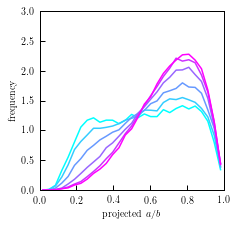

In [6]:
bins = np.linspace(0,1,30)
bin_centers = (bins[:-1]+bins[1:])/2.0

mag_key = 'obs_Mag_r'

mask_1 = (mock_1[mag_key]<-17) & (mock_1[mag_key]>-18)
mask_2 = (mock_2[mag_key]<-18) & (mock_2[mag_key]>-19)
mask_3 = (mock_3[mag_key]<-19) & (mock_3[mag_key]>-20)
mask_4 = (mock_4[mag_key]<-20) & (mock_4[mag_key]>-21)
mask_5 = (mock_5[mag_key]<-21) & (mock_5[mag_key]>-22)
mask_6 = (mock_6[mag_key]<-22) & (mock_6[mag_key]>-23)

disks_1       = mock_1['disk']
ellipticals_1 = mock_1['elliptical']
disks_2       = mock_2['disk']
ellipticals_2 = mock_2['elliptical']
disks_3       = mock_3['disk']
ellipticals_3 = mock_3['elliptical']
disks_4       = mock_4['disk']
ellipticals_4 = mock_4['elliptical']
disks_5       = mock_5['disk']
ellipticals_5 = mock_5['elliptical']
disks_6       = mock_6['disk']
ellipticals_6 = mock_6['elliptical']

x = mock_1['galaxy_projected_b_to_a']
counts_1 = np.histogram(x[mask_1], bins=bins)[0]
counts_1 = 1.0*counts_1/np.sum(mask_1)/np.diff(bins)
counts_1a = np.histogram(x[mask_1 & disks_1], bins=bins)[0]
counts_1a = 1.0*counts_1a/np.sum(mask_1)/np.diff(bins)
counts_1b = np.histogram(x[mask_1 & ellipticals_1], bins=bins)[0]
counts_1b = 1.0*counts_1b/np.sum(mask_1)/np.diff(bins)

x = mock_2['galaxy_projected_b_to_a']
counts_2 = np.histogram(x[mask_2], bins=bins)[0]
counts_2 = 1.0*counts_2/np.sum(mask_2)/np.diff(bins)
counts_2a = np.histogram(x[mask_2 & disks_2], bins=bins)[0]
counts_2a = 1.0*counts_2a/np.sum(mask_2)/np.diff(bins)
counts_2b = np.histogram(x[mask_2 & ellipticals_2], bins=bins)[0]
counts_2b = 1.0*counts_2b/np.sum(mask_2)/np.diff(bins)

x = mock_3['galaxy_projected_b_to_a']
counts_3 = np.histogram(x[mask_3], bins=bins)[0]
counts_3 = 1.0*counts_3/np.sum(counts_3)/np.diff(bins)
counts_3a = np.histogram(x[mask_3 & disks_3], bins=bins)[0]
counts_3a = 1.0*counts_3a/np.sum(mask_3)/np.diff(bins)
counts_3b = np.histogram(x[mask_3 & ellipticals_3], bins=bins)[0]
counts_3b = 1.0*counts_3b/np.sum(mask_3)/np.diff(bins)

x = mock_4['galaxy_projected_b_to_a']
counts_4 = np.histogram(x[mask_4], bins=bins)[0]
counts_4 = 1.0*counts_4/np.sum(counts_4)/np.diff(bins)
counts_4a = np.histogram(x[mask_4 & disks_4], bins=bins)[0]
counts_4a = 1.0*counts_4a/np.sum(mask_4)/np.diff(bins)
counts_4b = np.histogram(x[mask_4 & ellipticals_4], bins=bins)[0]
counts_4b = 1.0*counts_4b/np.sum(mask_4)/np.diff(bins)

x = mock_5['galaxy_projected_b_to_a']
counts_5 = np.histogram(x[mask_5], bins=bins)[0]
counts_5 = 1.0*counts_5/np.sum(counts_5)/np.diff(bins)
counts_5a = np.histogram(x[mask_5 & disks_5], bins=bins)[0]
counts_5a = 1.0*counts_5a/np.sum(mask_5)/np.diff(bins)
counts_5b = np.histogram(x[mask_5 & ellipticals_5], bins=bins)[0]
counts_5b = 1.0*counts_5b/np.sum(mask_5)/np.diff(bins)

x = mock_6['galaxy_projected_b_to_a']
counts_6 = np.histogram(x[mask_6], bins=bins)[0]
counts_6 = 1.0*counts_6/np.sum(counts_6)/np.diff(bins)
counts_6a = np.histogram(x[mask_6 & disks_6], bins=bins)[0]
counts_6a = 1.0*counts_6a/np.sum(mask_6)/np.diff(bins)
counts_6b = np.histogram(x[mask_6 & ellipticals_6], bins=bins)[0]
counts_6b = 1.0*counts_6b/np.sum(mask_6)/np.diff(bins)

colors = plt.cm.cool(np.linspace(0,1,6))

plt.figure(figsize=(3.3,3.3))
plt.plot(bin_centers, counts_1, color=colors[0])
plt.plot(bin_centers, counts_2, color=colors[1])
plt.plot(bin_centers, counts_3, color=colors[2])
plt.plot(bin_centers, counts_4, color=colors[3])
plt.plot(bin_centers, counts_5, color=colors[4])
plt.plot(bin_centers, counts_6, color=colors[5])
plt.xlim([0,1])
plt.ylim([0,3.0])
plt.xlabel(r'projected $a/b$')
plt.ylabel('frequency')
plt.show()



In [7]:
from astropy.table import Table
t_1 = Table.read('./data/sample_1_shapes.dat', format='ascii')
t_2 = Table.read('./data/sample_2_shapes.dat', format='ascii')
t_3 = Table.read('./data/sample_3_shapes.dat', format='ascii')
t_4 = Table.read('./data/sample_4_shapes.dat', format='ascii')
t_5 = Table.read('./data/sample_5_shapes.dat', format='ascii')
t_6 = Table.read('./data/sample_6_shapes.dat', format='ascii')

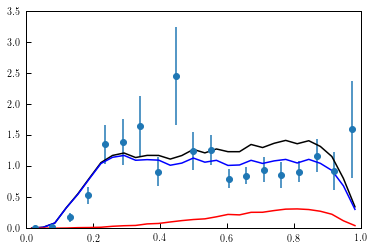

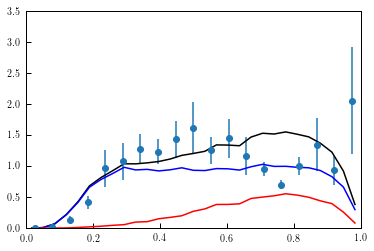

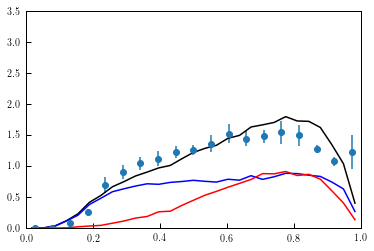

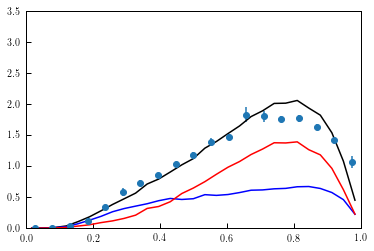

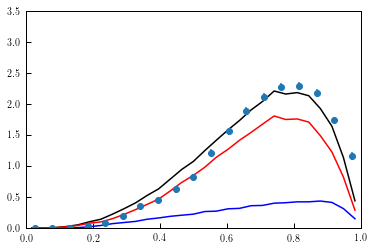

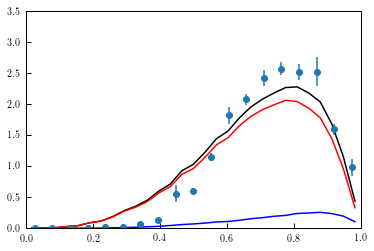

In [8]:
plt.figure()
plt.plot(bin_centers, counts_1, color='black')
plt.plot(bin_centers, counts_1a, color='blue')
plt.plot(bin_centers, counts_1b, color='red')
plt.errorbar(t_1['q'],t_1['frequency'],t_1['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()

plt.figure()
plt.plot(bin_centers, counts_2, color='black')
plt.plot(bin_centers, counts_2a, color='blue')
plt.plot(bin_centers, counts_2b, color='red')
plt.errorbar(t_2['q'],t_2['frequency'],t_2['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()

plt.figure()
plt.plot(bin_centers, counts_3, color='black')
plt.plot(bin_centers, counts_3a, color='blue')
plt.plot(bin_centers, counts_3b, color='red')
plt.errorbar(t_3['q'],t_3['frequency'],t_3['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()

plt.figure()
plt.plot(bin_centers, counts_4, color='black')
plt.plot(bin_centers, counts_4a, color='blue')
plt.plot(bin_centers, counts_4b, color='red')
plt.errorbar(t_4['q'],t_4['frequency'],t_4['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()

plt.figure()
plt.plot(bin_centers, counts_5, color='black')
plt.plot(bin_centers, counts_5a, color='blue')
plt.plot(bin_centers, counts_5b, color='red')
plt.errorbar(t_5['q'],t_5['frequency'],t_5['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()

plt.figure()
plt.plot(bin_centers, counts_6, color='black')
plt.plot(bin_centers, counts_6a, color='blue')
plt.plot(bin_centers, counts_6b, color='red')
plt.errorbar(t_6['q'],t_6['frequency'],t_6['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()

In [13]:
def lnlike(theta, y, yerr):
    """
    """
    # set model parameters
    d = {'disk_shape_mu_1_centrals': theta[0],
         'disk_shape_mu_2_centrals': theta[1],
         'disk_shape_var_1_centrals': theta[2],
         'disk_shape_var_2_centrals': theta[3],
         'elliptical_shape_mu_1_centrals': theta[4],
         'elliptical_shape_mu_2_centrals': theta[5],
         'elliptical_shape_var_1_centrals': theta[6],
         'elliptical_shape_var_2_centrals': theta[7]}
    
    # simulate mock galaxy sample
    mock = make_galaxy_sample(mag_lim=-20, size=10**5, **d)
    
    # measure shape distribution
    bins = np.linspace(0,1,20)
    bin_centers = (bins[:-1]+bins[1:])/2.0
    
    mag_key = 'obs_Mag_r'
    mask = (mock[mag_key]<-20) & (mock[mag_key]>-21)
    
    x = mock_1['galaxy_projected_b_to_a']
    counts = np.histogram(x[mask], bins=bins)[0]
    counts = 1.0*counts/np.sum(mask)/np.diff(bins)
    
    # estimate model error
    N = np.histogram(x[mask], bins=bins)[0]
    model_err = 1.0/np.sqrt(N)/np.sum(mask)/np.diff(bins)
    
    # combine model and measurement error
    total_err_squared = model_err**2 + yerr**2
    
    return np.sum((counts - y)**2/total_err_squared)

In [20]:
theta0 = [0.1071, 0.8, 0.0078, 0.0056, 0.16667, 0.4, 0.01068, 0.04]

%timeit(lnlike(theta0, t_4['frequency'], t_4['err']))

1 loop, best of 3: 311 ms per loop


In [19]:
def lnprior(theta):
    
    # disk parameters
    disk_mu_1 = theta[0]
    disk_mu_2 = theta[1]
    disk_var_1 = theta[2]
    disk_var_2 = theta[3]
    
    # elliptical parameters
    elliptical_mu_1 = theta[4]
    elliptical_mu_2 = theta[5]
    elliptical_var_1 = theta[6]
    elliptical_var_2 = theta[7]
    
    result = 0.0
    
    if (disk_mu_1>0.0) & (disk_mu_1<1.0):
        pass
    else:
        result += -np.inf
    
    if (disk_mu_2>0.0) & (disk_mu_2<1.0):
        pass
    else:
        result += -np.inf
    
    if (disk_var_1>0.0):
        pass
    else:
        result += -np.inf
    
    if (disk_var_2>0.0):
        pass
    else:
        result += -np.inf
        
    if (elliptical_mu_1>0.0) & (elliptical_mu_1<1.0):
        pass
    else:
        result += -np.inf
    
    if (elliptical_mu_2>0.0) & (elliptical_mu_2<1.0):
        pass
    else:
        result += -np.inf
    
    if (elliptical_var_1>0.0):
        pass
    else:
        result += -np.inf
    
    if (elliptical_var_2>0.0):
        pass
    else:
        result += -np.inf
    
    return result

In [29]:
def lnprob(theta, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, y, yerr)

In [30]:
lnprob(theta0,  t_4['frequency'], t_4['err'])

46573.69197513558

In [48]:
ndim, nwalkers = 8, 100
pos = [theta0 + 1e-5*np.random.randn(ndim) for i in range(nwalkers)]

In [49]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(t_4['frequency'], t_4['err']), threads=4)

In [50]:
sampler.run_mcmc(pos, 10)

(array([[0.10710568, 0.80000529, 0.00778272, 0.00561175, 0.16666615,
         0.4000109 , 0.01068924, 0.04001682],
        [0.10710685, 0.80004007, 0.00781544, 0.00559996, 0.16665914,
         0.39997788, 0.0107009 , 0.03995897],
        [0.10706302, 0.80001029, 0.00776966, 0.00558194, 0.16667579,
         0.40005188, 0.01066849, 0.03998216],
        [0.10707892, 0.79996013, 0.00782604, 0.00560224, 0.16663519,
         0.39995425, 0.01068613, 0.04003681],
        [0.10709714, 0.79999351, 0.00779252, 0.00559824, 0.1666771 ,
         0.39999456, 0.01068566, 0.04000074],
        [0.1071117 , 0.79999539, 0.00779589, 0.00559478, 0.16666863,
         0.40000202, 0.0106938 , 0.03999704],
        [0.10706863, 0.79999858, 0.00779702, 0.00558015, 0.16666981,
         0.40001388, 0.01071437, 0.04004315],
        [0.10707345, 0.79999075, 0.00782825, 0.00560662, 0.16665585,
         0.3999986 , 0.01066632, 0.03995461],
        [0.10708732, 0.79995341, 0.00777547, 0.00555808, 0.16668067,
         0.

In [51]:
samples = sampler.chain[:, :, :].reshape((-1, ndim))

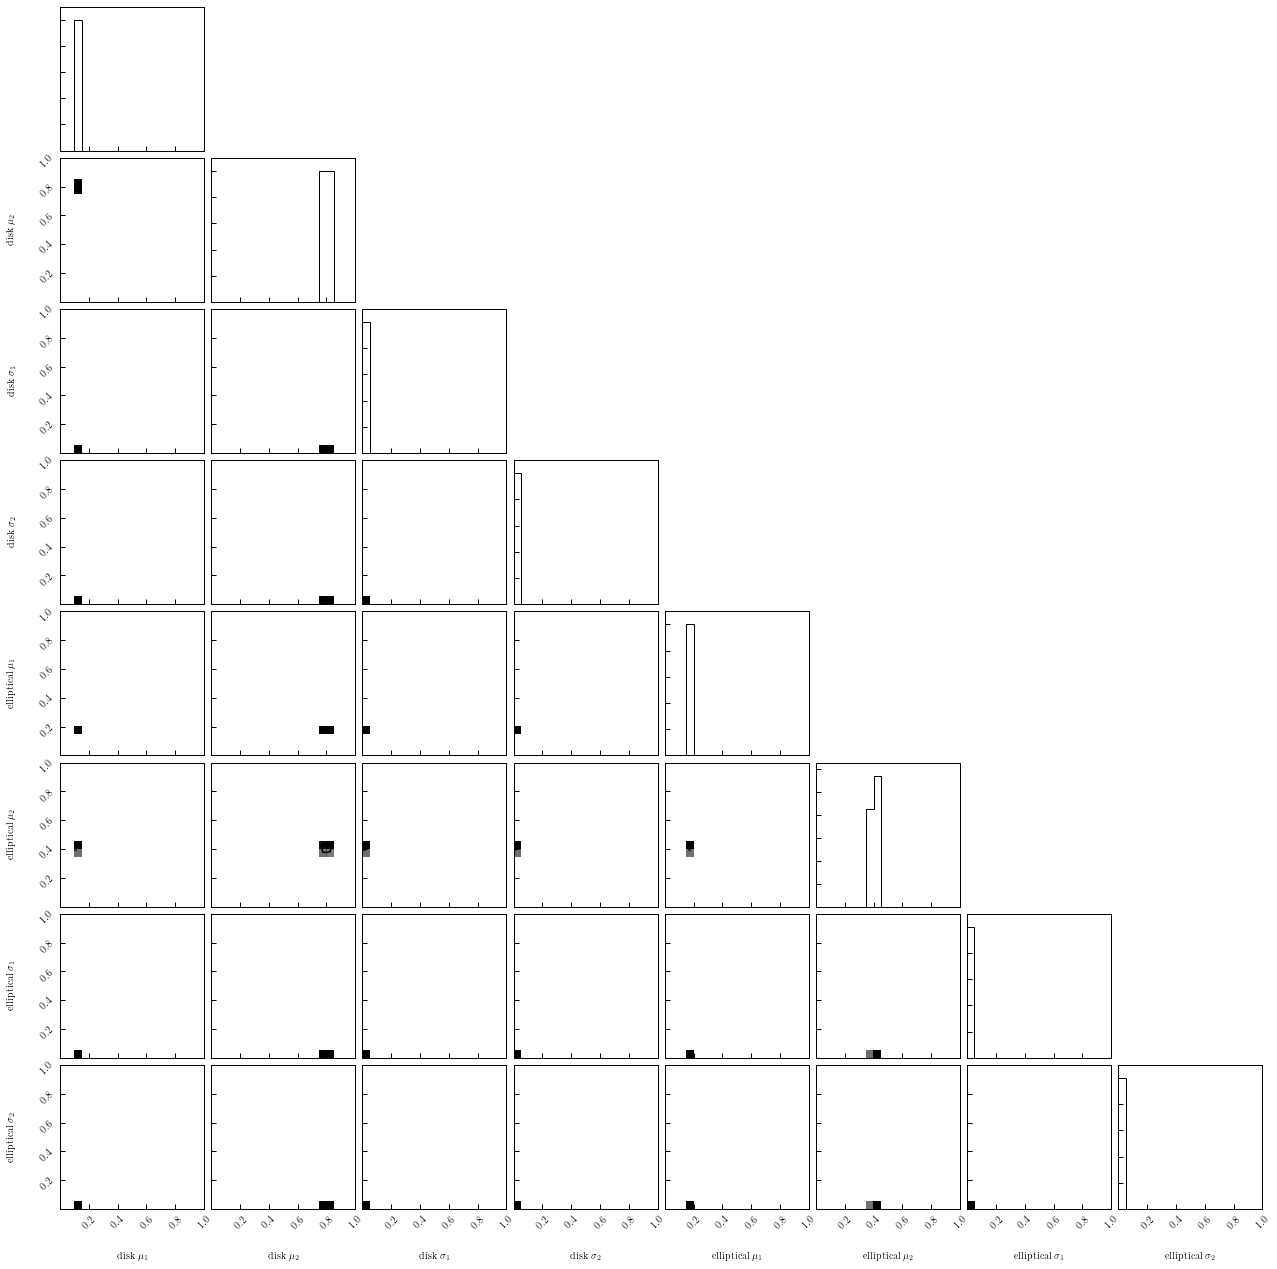

In [52]:
import corner

labels = [r"disk $\mu_1$", r"disk $\mu_2$", r"disk $\sigma_1$", r"disk $\sigma_2$",
          r"elliptical $\mu_1$", r"elliptical $\mu_2$", r"elliptical $\sigma_1$", r"elliptical $\sigma_2$"]
ranges = [(0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1)]
fig = corner.corner(samples, labels=labels, range=ranges)